In [48]:
#importing the libraries
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as ss
import sys
from scipy.stats import ks_2samp
import matplotlib.pyplot as plt
import nltk
import numpy as np
import re 
import pandas as pd
import string
import seaborn as sns

from nltk.corpus import stopwords  # Remove useless words
from nltk.stem.lancaster import LancasterStemmer  # Convert words to base form; 

# Import packages that help us to create document-term matrix
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import f1_score, precision_score, recall_score, precision_recall_curve, fbeta_score, confusion_matrix
from sklearn.metrics import roc_auc_score, roc_curve
# Import ML algos
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.ensemble import RandomForestClassifier

C:\Users\abhis_000\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


# Training has two different approach

# 1 . Using BLSTM deep learning approach
# 2.  Trained with different models and selection was done on F1 score.

# first approach

In [2]:
#loading the training data
training_data = pd.read_csv('../Data/train.csv/train.csv')

In [3]:
#data sample,head
print(training_data.head(20))
print(training_data.shape)

                  id                                       comment_text  \
0   0000997932d777bf  Explanation\nWhy the edits made under my usern...   
1   000103f0d9cfb60f  D'aww! He matches this background colour I'm s...   
2   000113f07ec002fd  Hey man, I'm really not trying to edit war. It...   
3   0001b41b1c6bb37e  "\nMore\nI can't make any real suggestions on ...   
4   0001d958c54c6e35  You, sir, are my hero. Any chance you remember...   
5   00025465d4725e87  "\n\nCongratulations from me as well, use the ...   
6   0002bcb3da6cb337       COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK   
7   00031b1e95af7921  Your vandalism to the Matt Shirvington article...   
8   00037261f536c51d  Sorry if the word 'nonsense' was offensive to ...   
9   00040093b2687caa  alignment on this subject and which are contra...   
10  0005300084f90edc  "\nFair use rationale for Image:Wonju.jpg\n\nT...   
11  00054a5e18b50dd4  bbq \n\nbe a man and lets discuss it-maybe ove...   
12  0005c987bdfc9d4b  Hey

In [4]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


In [5]:
#this is multilevel multiclass problem, i can see some of the data is clean data.
#creating a new output class named clean_data

total_class_in_a_row = training_data.iloc[:,2:].sum(axis = 1)
#total_class_in_a_row is a Series that contains total number of class in a particular observation.

training_data['clean_data'] = (total_class_in_a_row == 0)

#clean_data contains True and False value as per previous class is present or not

In [6]:
total_class_in_a_row

0         0
1         0
2         0
3         0
4         0
5         0
6         4
7         0
8         0
9         0
10        0
11        0
12        1
13        0
14        0
15        0
16        1
17        0
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
         ..
159541    3
159542    0
159543    0
159544    0
159545    0
159546    2
159547    0
159548    0
159549    0
159550    0
159551    0
159552    0
159553    0
159554    3
159555    0
159556    0
159557    0
159558    0
159559    0
159560    0
159561    0
159562    0
159563    0
159564    0
159565    0
159566    0
159567    0
159568    0
159569    0
159570    0
Length: 159571, dtype: int64

In [7]:
print("total number of clean data is :{}".format(training_data['clean_data'].sum()))
print("total number of not clean data is :{}".format((training_data.iloc[:,2:8].sum(axis = 1) >=1).sum()))
      
clean_data_total = training_data['clean_data'].sum()
not_clean_data_total = (training_data.iloc[:,2:8].sum(axis = 1) >=1).sum()

total number of clean data is :143346
total number of not clean data is :16225


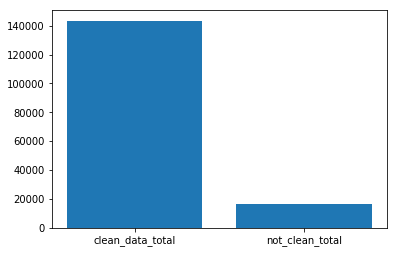

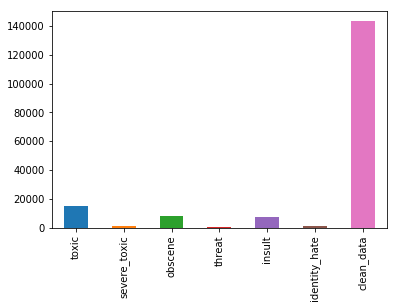

In [8]:
#from above result e can see that data is highly imbalanced. We have 1433346 clean data, means it did not have any type of toxic 
#class and only 16225 observation has toxic comments
x = ['clean_data_total','not_clean_total']
y = [clean_data_total,not_clean_data_total]
plt.bar(x,y)
plt.show()
#plot for different class count
count = training_data.iloc[:,2:].sum()
count.plot(kind = 'bar')

In [9]:
#numerical presentation of differnt class count
#we can see data is imbalance
count

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean_data       143346.0
dtype: float64

In [10]:
#working on null values
print(training_data.isnull().sum())

id               0
comment_text     0
toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    0
clean_data       0
dtype: int64


In [11]:
#again i am seeing the head of my data
training_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_data
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True


In [12]:
#finding correlation between toxic and serve_toxic,  i went through  below  corrlation technique
b = []
def confusion_metrix(df,column1,column2):
    confusion_matrix = pd.crosstab(df[column1], df[column2])
    b.append(confusion_matrix)
    return confusion_metrix

In [13]:
#crosstab between different categorical class

column = training_data.columns[3:]
for col in column:
    conf_met = confusion_metrix(training_data,'toxic',col)
    

In [14]:
for data in b:
    print(data)

severe_toxic       0     1
toxic                     
0             144277     0
1              13699  1595
obscene       0     1
toxic                
0        143754   523
1          7368  7926
threat       0    1
toxic              
0       144248   29
1        14845  449
insult       0     1
toxic               
0       143744   533
1         7950  7344
identity_hate       0     1
toxic                      
0              144174   103
1               13992  1302
clean_data  False   True 
toxic                    
0             931  143346
1           15294       0


In [ ]:
#by looking above data we can say all observation related to severe_toxic are toxic also
#below i tried to find the correlation between the different classes.


In [176]:
#training_data['toxic']
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for i in class_names:
    print('pearson correlation between toxic and {} class:'.format(i),training_data['toxic'].corr(training_data[i],method = 'pearson'))
    print('kendall correlation between toxic and {} class:'.format(i),training_data['toxic'].corr(training_data[i],method = 'kendall'))
    print('spearman correlation between toxic and {} class:'.format(i),training_data['toxic'].corr(training_data[i],method = 'spearman'))
    print('\n')
    
    
    

pearson correlation between toxic and toxic class: 1.0
kendall correlation between toxic and toxic class: 0.9999999999999999
spearman correlation between toxic and toxic class: 1.0


pearson correlation between toxic and severe_toxic class: 0.30861909674070076
kendall correlation between toxic and severe_toxic class: 0.3086190967406997
spearman correlation between toxic and severe_toxic class: 0.3086190967406997


pearson correlation between toxic and obscene class: 0.6765145229708253
kendall correlation between toxic and obscene class: 0.6765145229708273
spearman correlation between toxic and obscene class: 0.6765145229708273


pearson correlation between toxic and threat class: 0.15705840936596807
kendall correlation between toxic and threat class: 0.15705840936596863
spearman correlation between toxic and threat class: 0.15705840936596863


pearson correlation between toxic and insult class: 0.6475181270016772
kendall correlation between toxic and insult class: 0.6475181270016792
sp

In [179]:
class_names = ['toxic', 'severe_toxic', 'obscene', 'threat', 'insult', 'identity_hate']
for i in class_names:
    ks_stat, p_value = ks_2samp(training_data['toxic'].values,training_data[i].values)
    print(' Kolmogorov-Smirnov test:    KS-stat = %.6f    p-value = %.3e\n' % (ks_stat, p_value))

 Kolmogorov-Smirnov test:    KS-stat = 0.000000    p-value = 1.000e+00

 Kolmogorov-Smirnov test:    KS-stat = 0.085849    p-value = 0.000e+00

 Kolmogorov-Smirnov test:    KS-stat = 0.042896    p-value = 4.706e-128

 Kolmogorov-Smirnov test:    KS-stat = 0.092849    p-value = 0.000e+00

 Kolmogorov-Smirnov test:    KS-stat = 0.046481    p-value = 2.824e-150

 Kolmogorov-Smirnov test:    KS-stat = 0.087040    p-value = 0.000e+00



In [186]:
#till above i have worked on data analysis part
#Conclusion: its a multiclass classification problem, having unbalance dataset, there is some correlation between the classes.
#i have added one column named clean_data to training_data

In [187]:
training_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean_data
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,True
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,True
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,True
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,True
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,True


In [188]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 9 columns):
id               159571 non-null object
comment_text     159571 non-null object
toxic            159571 non-null int64
severe_toxic     159571 non-null int64
obscene          159571 non-null int64
threat           159571 non-null int64
insult           159571 non-null int64
identity_hate    159571 non-null int64
clean_data       159571 non-null bool
dtypes: bool(1), int64(6), object(2)
memory usage: 9.9+ MB


In [189]:
#we have already checked that dataset do not have missing values

# Cheking the 1st 3 comments

In [15]:
training_data['comment_text'][0]

"Explanation\nWhy the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27"

In [16]:
training_data['comment_text'][1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [17]:
#Count for each class
training_data_count=training_data.iloc[:,2:].sum()
print(training_data_count)

toxic             15294.0
severe_toxic       1595.0
obscene            8449.0
threat              478.0
insult             7877.0
identity_hate      1405.0
clean_data       143346.0
dtype: float64


# text preprocessing

In [3]:
# Text preprocessing steps - remove numbers, capital letters, punctuation, '\n'
import re
import string

# remove all numbers with letters attached to them
alphanumeric = lambda x: re.sub('\w*\d\w*', ' ', x)

# '[%s]' % re.escape(string.punctuation),' ' - replace punctuation with white space
# .lower() - convert all strings to lowercase 
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

# Remove all '\n' in the string and replace it with a space
remove_n = lambda x: re.sub("\n", " ", x)

# Remove all non-ascii characters 
remove_non_ascii = lambda x: re.sub(r'[^\x00-\x7f]',r' ', x)

# Apply all the lambda functions wrote previously through .map on the comments column
training_data['comment_text'] = training_data['comment_text'].map(alphanumeric).map(punc_lower).map(remove_n).map(remove_non_ascii)



In [19]:
training_data['comment_text'][0]

'explanation why the edits made under my username hardcore metallica fan were reverted  they weren t vandalisms  just closure on some gas after i voted at new york dolls fac  and please don t remove the template from the talk page since i m retired now        '

In [4]:
# Check percentage of comments that are toxic compared to normal comments
training_data.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [5]:
#now we have much cleaner text
training_data.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,0000997932d777bf,explanation why the edits made under my userna...,0,0,0,0,0,0
1,000103f0d9cfb60f,d aww he matches this background colour i m s...,0,0,0,0,0,0
2,000113f07ec002fd,hey man i m really not trying to edit war it...,0,0,0,0,0,0
3,0001b41b1c6bb37e,more i can t make any real suggestions on im...,0,0,0,0,0,0
4,0001d958c54c6e35,you sir are my hero any chance you remember...,0,0,0,0,0,0


In [21]:
stop_words = set(stopwords.words('english'))

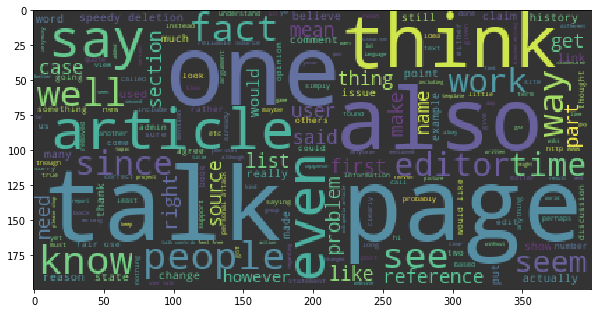

In [208]:
#word cloud for clean data, i have taken most frequest 500 words
from wordcloud import WordCloud
subset_clean_data = training_data[training_data['clean_data'] == True]
text_data = subset_clean_data.comment_text.values
wc = WordCloud(stopwords = stop_words,max_words = 500)
wc.generate(" ".join(text_data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(colormap='viridis',random_state = 41),alpha = .80)
plt.show()

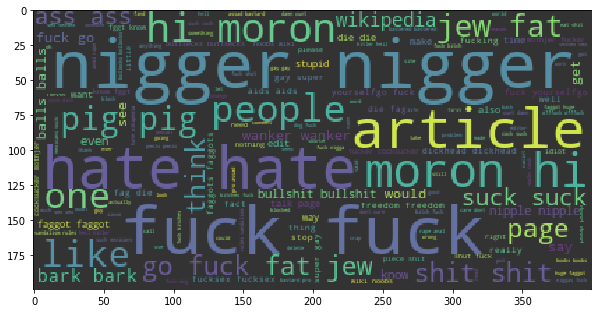

In [209]:
#for toxic
subset_clean_data = training_data[training_data['toxic'] == True]
text_data = subset_clean_data.comment_text.values
wc = WordCloud(stopwords = stop_words,max_words = 500)
wc.generate(" ".join(text_data))
plt.figure(figsize=(10,10))
plt.imshow(wc.recolor(colormap='viridis',random_state = 41),alpha = .80)
plt.show()

In [24]:
training_data.columns

Index(['id', 'comment_text', 'toxic', 'severe_toxic', 'obscene', 'threat',
       'insult', 'identity_hate', 'clean_data'],
      dtype='object')

In [52]:
training_data_with_class = training_data[training_data['clean_data']==False]

In [53]:
training_data_with_class.iloc[:,2:].sum()

toxic            15294.0
severe_toxic      1595.0
obscene           8449.0
threat             478.0
insult            7877.0
identity_hate     1405.0
clean_data           0.0
dtype: float64

In [6]:
X = training_data['comment_text'].values
y = training_data[['toxic', 'severe_toxic', 'obscene', 'threat','insult', 'identity_hate']].values
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.30, random_state=42)

In [7]:
type(X_train)

numpy.ndarray

In [8]:
y_train[5000]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [9]:
from numpy import array
from numpy import asarray
from numpy import zeros
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Dense,Input
from keras.layers import Flatten
from keras.layers import Embedding

C:\Users\abhis_000\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
C:\Users\abhis_000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\abhis_000\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\abhis_000\Anaconda3\lib\site-packages\tensorflow\p

In [10]:
from keras.layers import Bidirectional,GlobalAveragePooling1D,LSTM,Dropout
from keras.models import Model
from keras.preprocessing import text

In [11]:
max_length = 100
max_feature = 30000
embed_size = 100

token = text.Tokenizer(num_words = max_feature)

#t = Tokenizer(num_words = max_feature)
token.fit_on_texts(X_train)
vocab_size = len(token.word_index) + 1
# integer encode the documents
encoded_docs = token.texts_to_sequences(X_train)
print(encoded_docs)
print(len(encoded_docs))
# pad documents to a max length of  100 words

padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding='post')
print(padded_docs)
# load the whole embedding into memory
embeddings_index = dict()
f = open('../glove.6B.100d.txt',encoding="utf8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = asarray(values[1:], dtype='float32')
    embeddings_index[word] = coefs
f.close()
print('Loaded %s word vectors.' % len(embeddings_index))

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[[ 725    4  486 ...    0    0    0]
 [1276  219    3 ...    0    0    0]
 [  25   96   12 ...    0    0    0]
 ...
 [   3  449   22 ...    0    0    0]
 [ 609 1460    3 ...    0    0    0]
 [   6   20  235 ...    0    0    0]]
Loaded 400000 word vectors.


In [12]:
len(X_train)

111699

In [13]:
len(token.word_index)

135145

In [14]:
vocab_size
#padded_docs.shape

135146

In [15]:
padded_docs.shape

(111699, 100)

In [16]:
# create a weight matrix for words in training docs
embedding_matrix = zeros((vocab_size, 100))
for word, i in token.word_index.items():
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[i] = embedding_vector

In [17]:
len(token.word_index.items())

135145

In [18]:
len(embedding_matrix[3])

100

In [19]:
# define model
inp = Input(shape = (max_length,))
x = Embedding(vocab_size,embed_size,weights=[embedding_matrix])(inp)
x = Bidirectional(LSTM(50,return_sequences = True,dropout = .2,recurrent_dropout = .1))(x)
x = GlobalAveragePooling1D()(x)
x = Dense(50,activation='relu')(x)
x = Dropout(.1)(x)
x = Dense(6,activation='softmax')(x)
model = Model(input = inp,output = x)
model.compile(loss = 'categorical_crossentropy',optimizer = 'adam',metrics = ['accuracy'])
                  
                  

Instructions for updating:
Colocations handled automatically by placer.


C:\Users\abhis_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Update your `Model` call to the Keras 2 API: `Model(inputs=Tensor("in..., outputs=Tensor("de...)`
  if __name__ == '__main__':


In [20]:
padded_docs.shape

(111699, 100)

In [21]:
y_train.shape

(111699, 6)

In [22]:
y.shape

(159571, 6)

In [23]:
#i am selecting 20% randomly to validate my model
model.fit(padded_docs,y_train,batch_size = 32,epochs = 2,validation_split=.2)

Instructions for updating:
Use tf.cast instead.
Train on 89359 samples, validate on 22340 samples
Epoch 1/2
89359/89359 [==============================] - 1577s 18ms/step - loss: 0.2927 - accuracy: 0.9851 - val_loss: 0.2923 - val_accuracy: 0.9923
Epoch 2/2
89359/89359 [==============================] - 1523s 17ms/step - loss: 0.2782 - accuracy: 0.9828 - val_loss: 0.2847 - val_accuracy: 0.9903


In [ ]:
#we have training score 98% and validation is 97%

In [24]:
#saving the trained model
model.save("../trained_model/model_new.h5")
print("Saved model to disk")

Saved model to disk


In [26]:
import pickle
with open('../trained_model/token.pickle', 'wb') as f:
    pickle.dump(token, f)

In [27]:
from numpy import loadtxt
from keras.models import load_model
 
# load model
model = load_model('../trained_model/model_new.h5')
# summarize model.
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 100)               0         
_________________________________________________________________
embedding_1 (Embedding)      (None, 100, 100)          13514600  
_________________________________________________________________
bidirectional_1 (Bidirection (None, 100, 100)          60400     
_________________________________________________________________
global_average_pooling1d_1 ( (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 306 

In [28]:
X_test.shape

(47872,)

In [29]:
#token = text.Tokenizer(num_words = 30000)

#token = Tokenizer(num_words = max_feature)
#token.fit_on_texts(X_test)
#vocab_size = len(token.word_index) + 1
# integer encode the documents
encoded_docs_test = token.texts_to_sequences(X_test)
#print(encoded_docs_test)
# pad documents to a max length of  100 words

padded_docs_test = pad_sequences(encoded_docs_test, maxlen=100, padding='post')
print(len(padded_docs_test))

47872


In [80]:
y_test[1000]

array([1, 1, 1, 0, 1, 0], dtype=int64)

In [ ]:
len(X_test)

In [47]:
y_test[7000]

array([0, 0, 0, 0, 0, 0], dtype=int64)

In [30]:
predict_test = model.predict(padded_docs_test)

In [82]:
predict_test[1000]

array([0.41385224, 0.02016247, 0.2800479 , 0.01562639, 0.23162438,
       0.03868654], dtype=float32)

In [33]:
#Testting score
_, test_acc = model.evaluate(padded_docs_test, y_test, verbose=0)

In [34]:

test_acc

0.9911639094352722

In [31]:
from sklearn import metrics
matrix = metrics.classification_report(y_test.argmax(axis=1), predict_test.argmax(axis=1))

C:\Users\abhis_000\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [32]:
print(matrix)

             precision    recall  f1-score   support

          0       0.99      1.00      1.00     47587
          2       0.04      0.03      0.03       157
          3       0.00      0.00      0.00         5
          4       0.00      0.00      0.00       109
          5       0.00      0.00      0.00        14

avg / total       0.99      0.99      0.99     47872



# conclusion:We had good training and testing score, but data was imbalance so we did not got good f1 score for all the classes

# Second approach

In [ ]:
#below i will balance the data and will try to train the model with general approach

In [38]:
data_count=training_data.iloc[:,2:].sum()
data_count

toxic            15294
severe_toxic      1595
obscene           8449
threat             478
insult            7877
identity_hate     1405
dtype: int64

In [37]:
#will go though general approach to deal this multiclass problem
#will create seperate data for each class

In [39]:
data_toxic = training_data.loc[:,['id','comment_text','toxic']]
data_sev_tox = training_data.loc[:,['id','comment_text','severe_toxic']]
data_obscene = training_data.loc[:,['id','comment_text','obscene']]
data_threat = training_data.loc[:,['id','comment_text','threat']]
data_insult = training_data.loc[:,['id','comment_text','insult']]
data_ihate = training_data.loc[:,['id','comment_text','identity_hate']]

In [42]:
#balancing the data
#will randomly choose specified number of observation 
#toxic class
data_toxic_1 = data_toxic[data_toxic['toxic'] == 1].iloc[0:6000,:]
data_toxic_0 = data_toxic[data_toxic['toxic'] == 0].iloc[0:6000,:]
data_toxic_final = pd.concat([data_toxic_1, data_toxic_0], axis=0)

In [65]:
#severe_toxic
data_sev_tox_1 = data_sev_tox[data_sev_tox['severe_toxic'] == 1].iloc[0:1595,:]
data_sev_tox_0 = data_sev_tox[data_sev_tox['severe_toxic'] == 0].iloc[0:4000,:]
data_sev_tox_final = pd.concat([data_sev_tox_0, data_sev_tox_1], axis=0)

#obscene
data_obscene_1 = data_obscene[data_obscene['obscene'] == 1].iloc[0:6000,:]
data_obscene_0 = data_obscene[data_obscene['obscene'] == 0].iloc[0:6000,:]
data_obscene_final = pd.concat([data_obscene_1, data_obscene_0], axis=0)
#data_threat
data_threat_1 = data_threat[data_threat['threat'] == 1].iloc[0:478,:]
data_threat_0 = data_threat[data_threat['threat'] == 0].iloc[0:1500,:]
data_threat_final = pd.concat([data_threat_1, data_threat_0], axis=0)
#insult
data_insult_1 = data_insult[data_insult['insult'] == 1].iloc[0:6000,:]
data_insult_0 = data_insult[data_insult['insult'] == 0].iloc[0:6000,:]
data_insult_final = pd.concat([data_insult_1, data_insult_0], axis=0)
#identity_hate
data_ihate_1 = data_ihate[data_ihate['identity_hate'] == 1].iloc[0:1405,:]
data_ihate_0 = data_ihate[data_ihate['identity_hate'] == 0].iloc[0:4200,:]
data_ihate_final = pd.concat([data_ihate_1, data_ihate_0], axis=0)

In [66]:
#shape of each seperate dataset
print(data_toxic_final.shape)
print(data_sev_tox_final.shape)
print(data_obscene_final.shape)
print(data_threat_final.shape)
print(data_insult_final.shape)
print(data_ihate_final.shape)

(12000, 3)
(5595, 3)
(12000, 3)
(1978, 3)
(12000, 3)
(5605, 3)


In [60]:
#function to do TfIdf,ngram to capture sementics
from sklearn import svm
def cv_tf_train_test(df_done,label,vectorizer,ngram):

    ''' Train/Test split'''
    # Split the data into X and y data sets
    X = df_done.comment_text
    y = df_done[label]

    # Split our data into training and test data 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    ''' Count Vectorizer/TF-IDF '''

    # Vectorzation
    cv1 = vectorizer(ngram_range=(ngram), stop_words='english')
    
    X_train_cv1 = cv1.fit_transform(X_train) # Learn the vocabulary dictionary and return term-document matrix
    X_test_cv1  = cv1.transform(X_test)      # Learn a vocabulary dictionary of all tokens in the raw documents.
    
    # Output a Dataframe of the CountVectorizer with unique words as the labels
    # test = pd.DataFrame(X_train_cv1.toarray(), columns=cv1.get_feature_names())
    #training with different models'''
    
    mnb = MultinomialNB()
    mnb.fit(X_train_cv1, y_train)
    print('Multnomial done')
    
    svm_model = LinearSVC()
    svm_model.fit(X_train_cv1, y_train)
    print('svm completed')
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_train_cv1, y_train)
    print('RandomForest done')
    
    # Create a list of F1 score of all models 
    f1_score_data = {'F1 Score':[f1_score(mnb.predict(X_test_cv1), y_test),f1_score(svm_model.predict(X_test_cv1), y_test), f1_score(randomforest.predict(X_test_cv1), y_test)]} 
                          
    # Create DataFrame with the model names as column labels
    df_f1 = pd.DataFrame(f1_score_data, index=['MultinomialNB', 'SVM', 'Random Forest'])  

    return df_f1

In [61]:
df_tox_cv = cv_tf_train_test(data_toxic_final, 'toxic', TfidfVectorizer, (1,1))
df_tox_cv.rename(columns={'F1 Score': 'F1 Score(toxic)'}, inplace=True)

Multnomial done
svm completed
RandomForest done


In [62]:
df_tox_cv

,F1 Score(toxic)
MultinomialNB,0.881432
SVM,0.876789
Random Forest,0.854386


In [ ]:
print(data_toxic_final.shape)
print(data_sev_tox_final.shape)
print(data_obscene_final.shape)
print(data_threat_final.shape)
print(data_insult_final.shape)
print(data_ihate_final.shape)

In [64]:
data_sev_tox_final['severe_toxic'].value_counts()

1    3190
Name: severe_toxic, dtype: int64

In [68]:
#cv_tf_train_test will return a dataframe having F1 score corrsponds to different models
df_st_cv = cv_tf_train_test(data_sev_tox_final, 'severe_toxic', TfidfVectorizer, (1,1))
df_st_cv.rename(columns={'F1 Score': 'F1 Score(severe_toxic)'}, inplace=True)

df_obs_cv = cv_tf_train_test(data_obscene_final, 'obscene', TfidfVectorizer, (1,1))
df_obs_cv.rename(columns={'F1 Score': 'F1 Score(obscene)'}, inplace=True)

df_tht_cv = cv_tf_train_test(data_threat_final, 'threat', TfidfVectorizer, (1,1))
df_tht_cv.rename(columns={'F1 Score': 'F1 Score(threat)'}, inplace=True)

df_ins_cv = cv_tf_train_test(data_insult_final, 'insult', TfidfVectorizer, (1,1))
df_ins_cv.rename(columns={'F1 Score': 'F1 Score(insult)'}, inplace=True)

df_ihate_cv= cv_tf_train_test(data_ihate_final, 'identity_hate', TfidfVectorizer, (1,1))
df_ihate_cv.rename(columns={'F1 Score': 'F1 Score(identity_hate)'}, inplace=True)

Multnomial done
svm completed
RandomForest done
Multnomial done
svm completed
RandomForest done
Multnomial done
svm completed
RandomForest done
Multnomial done
svm completed
RandomForest done
Multnomial done
svm completed
RandomForest done


In [69]:
# Let's combine the dataframes into a master dataframe to compare F1 scores across all categories.
f1_all = pd.concat([df_tox_cv, df_st_cv, df_obs_cv, df_ins_cv, df_tht_cv, df_ihate_cv], axis=1)
f1_all

,F1 Score(toxic),F1 Score(severe_toxic),F1 Score(obscene),F1 Score(insult),F1 Score(threat),F1 Score(identity_hate)
MultinomialNB,0.881432,0.822086,0.900601,0.893676,0.669683,0.640227
SVM,0.876789,0.895623,0.927528,0.904962,0.843284,0.820930
Random Forest,0.854386,0.895259,0.906903,0.890049,0.838462,0.823799


In [ ]:
#looking into above F1 score we can say can select SVM or Random Forest

In [74]:
datalist = [data_toxic_final, data_sev_tox_final,data_obscene_final,data_threat_final,data_insult_final,data_ihate_final]
label = ['toxic', 'severe_toxic', 'obscene','threat', 'insult','identity_hate']

In [75]:
zipped_data = zip(datalist,label)

In [81]:
X[0:10]

42      you are gay or antisemmitian    archangel whit...
105            a pair of jew hating weiner nazi schmucks 
176     i think that your a fagget get a oife and burn...
218     kill all niggers    i have hard  that others h...
238     u r a tw  fuck off u gay boy u r smelly fuck u...
429     gay   the existence of cdvf is further proof t...
521     dictionaries  how dare you call my contributio...
887     you gay motherfucker i know where you live i a...
952     you studid cock sucker u stop callin me ok its...
1017    wouldn t be the first time bitch  fuck you i l...
Name: comment_text, dtype: object

In [84]:
type(y)

pandas.core.series.Series

In [ ]:
'''import pickle
with open('../trained_model/token.pickle', 'wb') as f:
    pickle.dump(token, f)'''

In [89]:
#this function will train 6 different dataset with RF abd will crete apickle file for tftdf and model seperatly.
#saving those pickle file into trained model folder
def pickle_model(df, label):
    
    X = df.comment_text
    y = df[label]
    tfidf = TfidfVectorizer(ngram_range=(1,1), stop_words='english')
    
    # DT matrix
    X_vect = tfidf.fit_transform(X)  
    with open('../trained_model/{}.pickle'.format(label + '_vect'), "wb") as f:   
        pickle.dump(tfidf, f)   
    randomforest = RandomForestClassifier(n_estimators=100, random_state=42)
    randomforest.fit(X_vect, y)
    # Create a new pickle file based on random forest
    with open('../trained_model/{}.pickle'.format(label + '_model'), "wb") as f:  
        pickle.dump(randomforest, f)

In [91]:
#using function pickle_model
for i, j in zip(datalist,label):
    pickle_model(i, j)

In [93]:
#read the pickle file one by one to avoid the mistake
with open('../trained_model/toxic_vect.pickle','rb') as f:
    toxic_vect = pickle.load(f)
with open('../trained_model/obscene_vect.pickle','rb') as f:
    obscene_vect = pickle.load(f)
with open('../trained_model/severe_toxic_vect.pickle','rb') as f:
    severe_toxic_vect = pickle.load(f)
with open('../trained_model/threat_vect.pickle','rb') as f:
    threat_vect = pickle.load(f)
with open('../trained_model/insult_vect.pickle','rb') as f:
    insult_vect = pickle.load(f)
with open('../trained_model/identity_hate_vect.pickle','rb') as f:
    identity_hate_vect = pickle.load(f)
    
with open('../trained_model/toxic_model.pickle','rb') as f:
    toxic_model = pickle.load(f)
with open('../trained_model/obscene_model.pickle','rb') as f:
    obscene_model = pickle.load(f)
with open('../trained_model/severe_toxic_model.pickle','rb') as f:
    severe_toxic_model = pickle.load(f)
with open('../trained_model/threat_model.pickle','rb') as f:
    threat_model = pickle.load(f)
with open('../trained_model/insult_model.pickle','rb') as f:
    insult_model = pickle.load(f)
with open('../trained_model/identity_hate_model.pickle','rb') as f:
    identity_hate_model = pickle.load(f)


In [118]:
#loading the test data and do prediction for classes
def prediction(test_df,vect,model):
    X = test_df.comment_text
    ohe = vect.transform(X)
    predict = model.predict(ohe)
    return predict
    
    
    

In [153]:
#loading test data
test_data = pd.read_csv('../Data/test.csv/test.csv')

In [154]:
test_data.shape

(153164, 2)

In [156]:
#prediction with different models
predic_toxic = prediction(test_data,toxic_vect,toxic_model)
predic_severe_toxic = prediction(test_data,severe_toxic_vect,severe_toxic_model)
predic_obscene = prediction(test_data,obscene_vect,obscene_model)
predic_threat = prediction(test_data,threat_vect,threat_model)
predic_insult = prediction(test_data,insult_vect,insult_model)
predic_identity_hate = prediction(test_data,identity_hate_vect,identity_hate_model)



In [157]:
print(len(predic_toxic))
print(len(predic_severe_toxic))
print(len(predic_obscene))
print(len(predic_threat))
print(len(predic_insult))
print(len(predic_identity_hate))





153164
153164
153164
153164
153164
153164


In [158]:
# dataframe for prediction class
dict = {'toxic':predic_toxic,'severe_toxic':predic_severe_toxic,'obscene':predic_obscene,'threat':predic_threat,
        'insult':predic_insult,'identity_hate':predic_identity_hate}
class_df = pd.DataFrame(dict)

In [159]:
#count of prediction in test data
class_df.iloc[:,0:].sum()

toxic            40414
severe_toxic     16572
obscene          30462
threat            6900
insult           31089
identity_hate    15041
dtype: int64

In [160]:
test_data['comment_text'].head()

0    Yo bitch Ja Rule is more succesful then you'll...
1    == From RfC == \n\n The title is fine as it is...
2    " \n\n == Sources == \n\n * Zawe Ashton on Lap...
3    :If you have a look back at the source, the in...
4            I don't anonymously edit articles at all.
Name: comment_text, dtype: object

In [161]:
test_data.columns


Index(['id', 'comment_text'], dtype='object')

In [163]:
class_df.head(100)

,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,1,1,1,1,1,1
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,0
5,0,0,0,0,0,0
6,0,0,0,0,0,0
7,1,0,0,0,0,0
8,0,0,0,0,0,0
9,0,0,0,0,0,0


In [164]:
#creating final output with test data and its predicted class
final_output =pd.concat([test_data,class_df],axis = 1)


In [165]:
final_output.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,1,1,1,1,1
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0


In [191]:
#putting name of the class into a list named out_class
out_class = []
for i in range(len(final_output)):
    out_class.append(final_output.ix[:,final_output.loc[i] == 1].columns)
   

C:\Users\abhis_000\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  This is separate from the ipykernel package so we can avoid doing imports until


In [192]:
out_class 

[Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
        'identity_hate'],
       dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index(['toxic'], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index(['toxic'], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index(['toxic', 'severe_toxic', 'obscene', 'threat', 'insult',
        'identity_hate'],
       dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index([], dtype='object'),
 Index(['toxic', 'obscene', 'i

In [199]:
#creating new column output_class in final_output dataframe
final_output['output_class'] = out_class

In [200]:
final_output.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,output_class
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...,1,1,1,1,1,1,"Index(['toxic', 'severe_toxic', 'obscene', 'th..."
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...,0,0,0,0,0,0,"Index([], dtype='object')"
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap...",0,0,0,0,0,0,"Index([], dtype='object')"
3,00017563c3f7919a,":If you have a look back at the source, the in...",0,0,0,0,0,0,"Index([], dtype='object')"
4,00017695ad8997eb,I don't anonymously edit articles at all.,0,0,0,0,0,0,"Index([], dtype='object')"


In [201]:
#saving final output in csv format
final_output.to_csv("../output/test_output_with_class.csv")